In [2]:
# Import all important libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the Dataset
df=pd.read_csv("train.csv")

In [4]:
# Check the shape of the dataset
df.shape

(404290, 6)

In [5]:
# Take only some samples because dataset size is too large
df=df.sample(30000)

In [6]:
# Check the first 5 rows of the dataset
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
334763,334763,461974,461975,Is ISI better than RAW?,What makes ISI better than RAW?,1
148695,148695,234384,234385,How difficult is it to get into Stanford or Ha...,How difficult is it to get into Stanford?,1
78159,78159,133328,133329,What is Theory U?,What is a theory?,0
245031,245031,21662,50270,How would scrapping Rs 500 and 1000 notes affe...,How does Demonetisation of 1000 and 500 rupees...,1
76270,76270,130410,130411,What are some of the best works of psychedelic...,What are the best psychedelic rock songs and h...,0


In [7]:
# Check is there any null values or not
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
# if there is any null values then remove it
df.dropna(axis=0,inplace=True)

is_duplicate
0    18944
1    11056
Name: count, dtype: int64
is_duplicate
0    63.146667
1    36.853333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

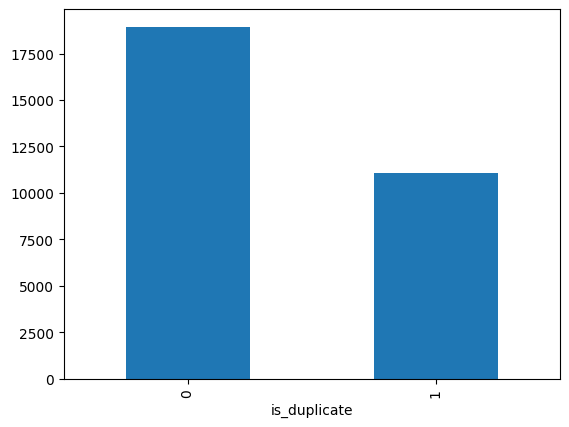

In [9]:
# Distribution of duplicates and non-duplicates question

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated question 

qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Number of unique questions:",np.unique(qid).shape[0])
x=qid.value_counts()>1
print("Number of Duplicate question:",x[x].shape[0])

Number of unique questions: 55376
Number of Duplicate question: 3429


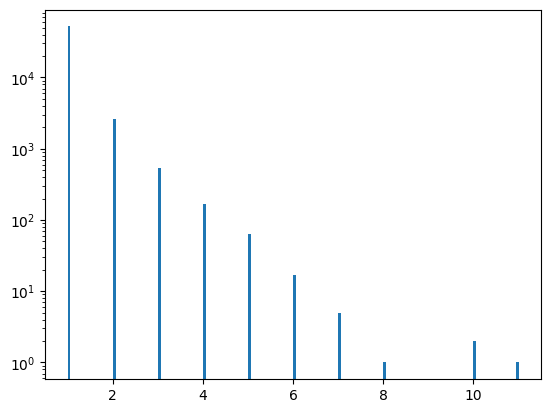

In [11]:
# Repeated question histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [12]:
# store the dataset in another dataframe to perform some operation
ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
334763,Is ISI better than RAW?,What makes ISI better than RAW?
148695,How difficult is it to get into Stanford or Ha...,How difficult is it to get into Stanford?
78159,What is Theory U?,What is a theory?
245031,How would scrapping Rs 500 and 1000 notes affe...,How does Demonetisation of 1000 and 500 rupees...
76270,What are some of the best works of psychedelic...,What are the best psychedelic rock songs and h...


In [10]:
# now we are extracting top 3000 features using BOW and we are spliting into two equal arrays then take first question
# and add 3000 feature in the q1_array and same with q2 

from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)

q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [11]:
# Now we are taking first question array create 3000 columns then take 3000 columns create 3000 in same row
# then concatenate two arrays, make a dataframe now in this dataframe we have all integer values
temp_df_1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df_2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df_1,temp_df_2],axis=1)
temp_df.shape

# 300000 samples and [ 30000(first_ques)+3000(second_ques) features] from total 30000 top words

(30000, 6000)

In [12]:
# Now we are adding a duplicate column soo that we can separate train and test data
temp_df['is_duplicate']=df['is_duplicate']

In [13]:
# Here is our final DataFrame
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
4955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
128143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
341882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
128352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Now we are importing train test split model to split our dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [16]:
# Now we are applying RandomForestClassifier model to predict the final output
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)
# Here is the accuracy

0.7463333333333333

In [21]:
# Now use another model XGB Classifier 
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7218333333333333

In [1]:
# Here we can clearly see that RandomForestClassifier is working best on this dataset 
# 1) We just simply use a technique to convert text into number specifically Bow
# 2) After converting these into number we just simply apply machine learning models to predict the output 
#     i) First we use RandomForestClassifier and get 74% of accuracy 
#    ii) Then we use XGBoostClassifier and get 72% of accuracy which is not better than RandomForest


# -------------------------------------Result--------------------------------------#
#                       74% of accuracy through RandomForestClassifier